<a href="https://colab.research.google.com/github/fintekhab/CODSOFT/blob/main/TitanicSurvivalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Titanic-Dataset.csv")

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [86]:
selectedcolumns = ['Name', 'Sex', 'Age', 'Fare', 'Survived', 'Pclass']
df_n = df[selectedcolumns]

df_n.count()

Name        891
Sex         891
Age         714
Fare        891
Survived    891
Pclass      891
dtype: int64

In [87]:
df_n_cleaned = df_n.dropna()
df_n_cleaned.count()


Name        714
Sex         714
Age         714
Fare        714
Survived    714
Pclass      714
dtype: int64

In [88]:
df_n_cleaned.head()

,Name,Sex,Age,Fare,Survived,Pclass
0,"Braund, Mr. Owen Harris",male,22.0,7.2500,0,3
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,1
2,"Heikkinen, Miss. Laina",female,26.0,7.9250,1,3
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,1
4,"Allen, Mr. William Henry",male,35.0,8.0500,0,3


**Statistical Measures of the Cleaned Data**

In [89]:
df_n_cleaned.describe()

,Age,Fare,Survived,Pclass
count,714.000000,714.000000,714.000000,714.000000
mean,29.699118,34.694514,0.406162,2.236695
std,14.526497,52.918930,0.491460,0.838250
min,0.420000,0.000000,0.000000,1.000000
25%,20.125000,8.050000,0.000000,1.000000
50%,28.000000,15.741700,0.000000,2.000000
75%,38.000000,33.375000,1.000000,3.000000
max,80.000000,512.329200,1.000000,3.000000


**Observing how Age, Sex and Fare varied among passengers**

In [90]:
m = 0
n = 0

for index, row in df_n_cleaned.iterrows():
  if row['Survived'] == 1:
     if row['Sex'] =='male':
      m = m+1
     else:
      f=f+1
  else:
    continue


print("Number of males survived = ", m)
print("Number of females survived = ",f)


Number of males survived =  93
Number of females survived =  985


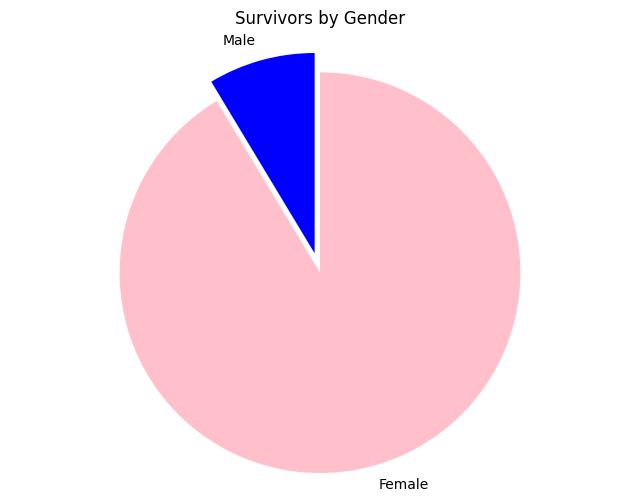

In [91]:
labels = ['Male', 'Female']
sizes = [m,f]
colors = ['blue','pink']

plt.figure(figsize = (8,6))
plt.pie(sizes, labels = labels, colors = colors, explode = (0.1,0), startangle = 90)
plt.title('Survivors by Gender')
plt.axis('equal')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [96]:
df_n_cleaned.loc[:,'Sex'] = df_n_cleaned['Sex'].replace({'male':0, 'female':1})

X =df_n_cleaned[['Sex', 'Age','Fare']]
y = df_n_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [97]:
model.score(X,y)

0.3201137276672795

In [98]:
X =df_n_cleaned[['Sex', 'Age','Fare', 'Pclass']]
y = df_n_cleaned['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
model.score(X,y)

0.38839751693633306

In [106]:
model.predict([[1, 38, 71.2833, 1]])



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.92145412])